Importing Data

In [2]:
import pandas as pd

df = pd.read_csv("BlackFriday_Data.csv")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [4]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [5]:
del df['Product_Category_2']
del df['Product_Category_3']
df.head(2)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200


In [6]:
for column in df.columns:
    print(column, ":" ,df[column].nunique())

User_ID : 5891
Product_ID : 3623
Gender : 2
Age : 7
Occupation : 21
City_Category : 3
Stay_In_Current_City_Years : 5
Marital_Status : 2
Product_Category_1 : 18
Purchase : 17959


<h4> Analysing Gender </h4>

<Axes: ylabel='Ratio'>

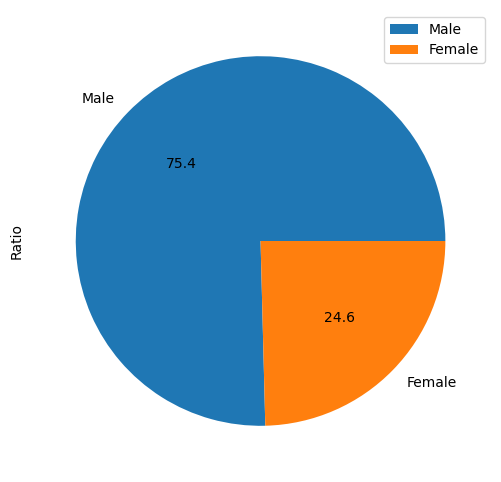

In [7]:
x1 = len(df[df['Gender'] == 'M'])
y1 = len(df[df['Gender'] == 'F'])
data = pd.DataFrame({'Ratio': [x1, y1]}, index = ['Male', 'Female'])
data.plot.pie(y= 'Ratio', figsize = (6,6), autopct = "%.1f")

another, simpler, way to create pie charts is using groupby

<Axes: title={'center': 'Gender Ratio'}>

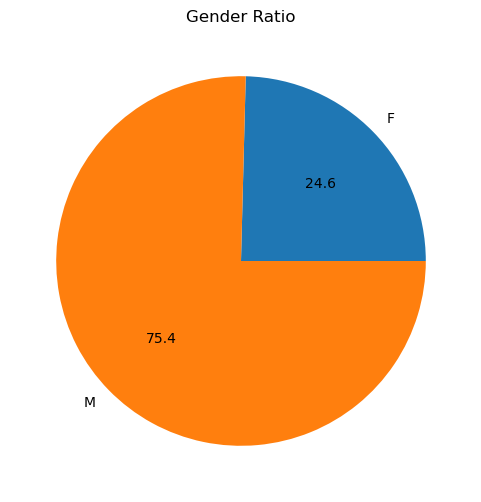

In [8]:
df.groupby('Gender').size().plot(kind = 'pie', 
                                 autopct = "%.1f",
                                 title = 'Gender Ratio',
                                 figsize = (6,6))

C:\Users\USER\AppData\Local\Temp\ipykernel_14836\547024047.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').sum()['Purchase'].plot(kind='pie', autopct = "%0.1f")


<Axes: ylabel='Purchase'>

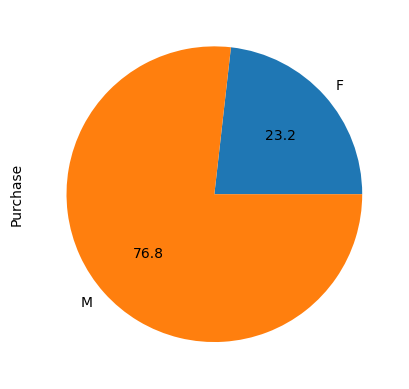

In [12]:
df.groupby('Gender').sum()['Purchase'].plot(kind='pie', autopct = "%0.1f")

C:\Users\USER\AppData\Local\Temp\ipykernel_14836\2201894441.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').mean()['Purchase'].plot(kind='pie', autopct = "%0.1f")


<Axes: ylabel='Purchase'>

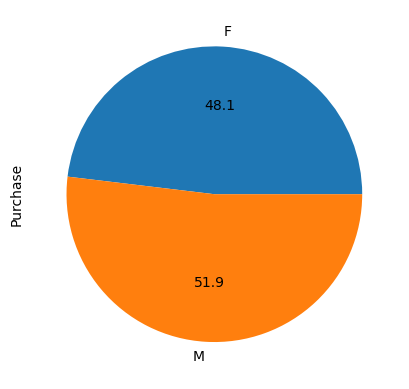

In [13]:
df.groupby('Gender').mean()['Purchase'].plot(kind='pie', autopct = "%0.1f")

<b>Inference: </b><br>
- We can see that Males (75.4) purchase almost three times than Females (24.6), with respect to the number of purchases. <br>
- The majority of money spent on purchase reflected by sum() is also by Males (76.8).<br>
- Although, the average amount spend is equal for Males (51.9) and Females (48.1). 
<hr>

<h4> Analysing Age and Marital Status </h4>

<Axes: title={'center': 'Purchase Distribution by Age'}, xlabel='Age'>

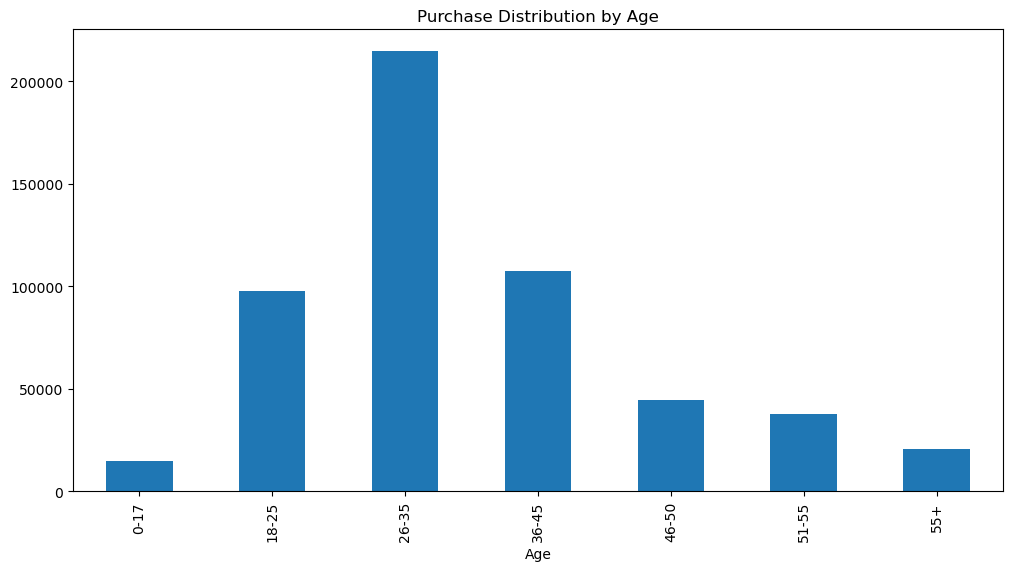

In [14]:
df.groupby('Age').size().plot(kind = 'bar', figsize = (12, 6), title = "Purchase Distribution by Age")

<Axes: xlabel='Age'>

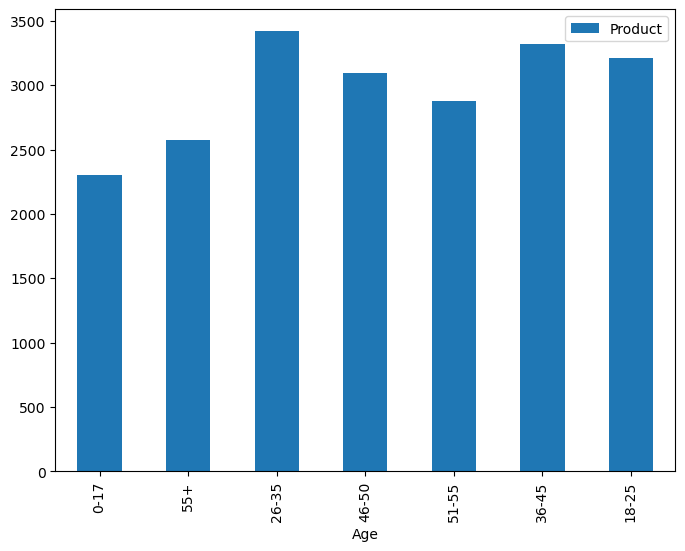

In [16]:
lst=[]
for i in df['Age'].unique():
    lst.append([i, df[df['Age'] == i]['Product_ID'].nunique()])

data = pd.DataFrame(lst, columns = ['Age', 'Product'])
data.plot.bar(x = 'Age', figsize = (8,6))

C:\Users\USER\AppData\Local\Temp\ipykernel_14836\3888461210.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize = (12,6), title = "Amount spend by Age")


<Axes: title={'center': 'Amount spend by Age'}, xlabel='Age'>

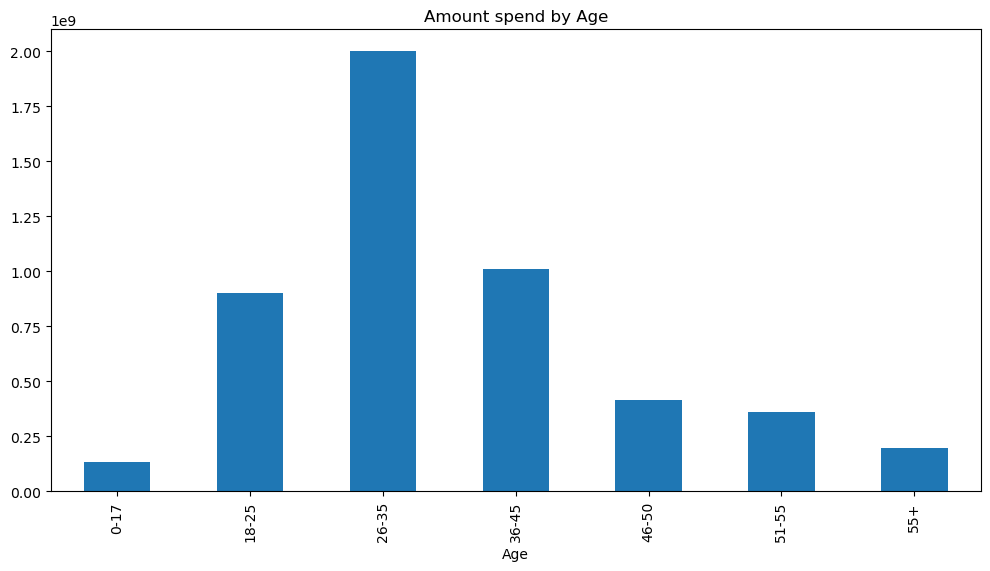

In [17]:
df.groupby('Age').sum()['Purchase'].plot(kind = 'bar', figsize = (12,6), title = "Amount spend by Age")

C:\Users\USER\AppData\Local\Temp\ipykernel_14836\3393067457.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age').mean()['Purchase'].plot(kind = 'bar', figsize = (12,6), title = "Amount spend by Age")


<Axes: title={'center': 'Amount spend by Age'}, xlabel='Age'>

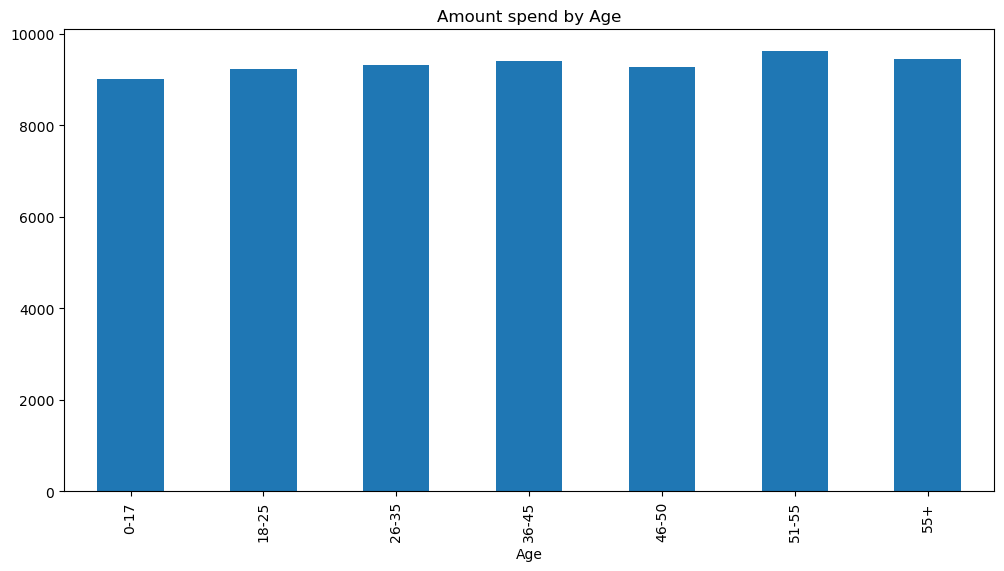

In [18]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'bar', figsize = (12,6), title = "Amount spend by Age")

C:\Users\USER\AppData\Local\Temp\ipykernel_14836\806542314.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Age').mean()['Purchase'].plot(kind = 'pie', autopct = '%0.1f')


<Axes: ylabel='Purchase'>

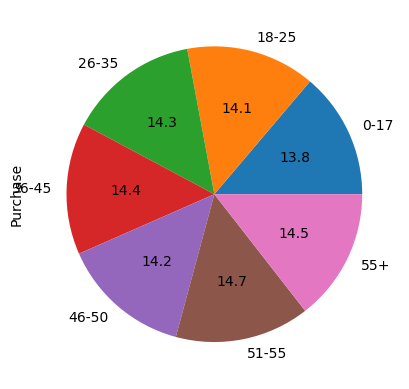

In [19]:
df.groupby('Age').mean()['Purchase'].plot(kind = 'pie', autopct = '%0.1f')

<Axes: >

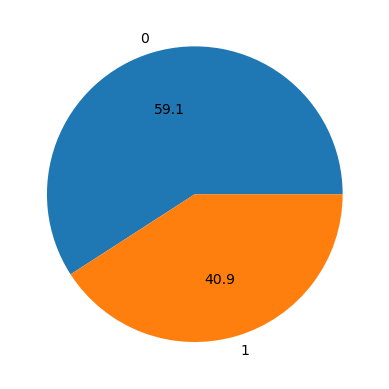

In [20]:
df.groupby('Marital_Status').size().plot(kind = 'pie', autopct = "%0.1f")

<Axes: >

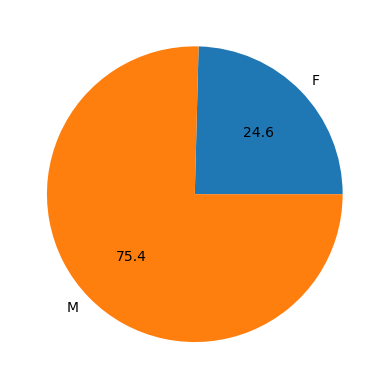

In [21]:
df.groupby('Gender').size().plot(kind = 'pie', autopct = "%0.1f")

<b> Inference </b><br>
- It is visible that most purchases made and the most money spent are by people in the age group 26-35. Although the average amount remains almost same throughout the age groups. <br>
- In accordance to Marital Status, Unmarried (59.1) people purchase slightly more than Married (40.9).
<hr>

<h4> MultiColumn Analysis </h4>

<Axes: xlabel='Age', ylabel='count'>

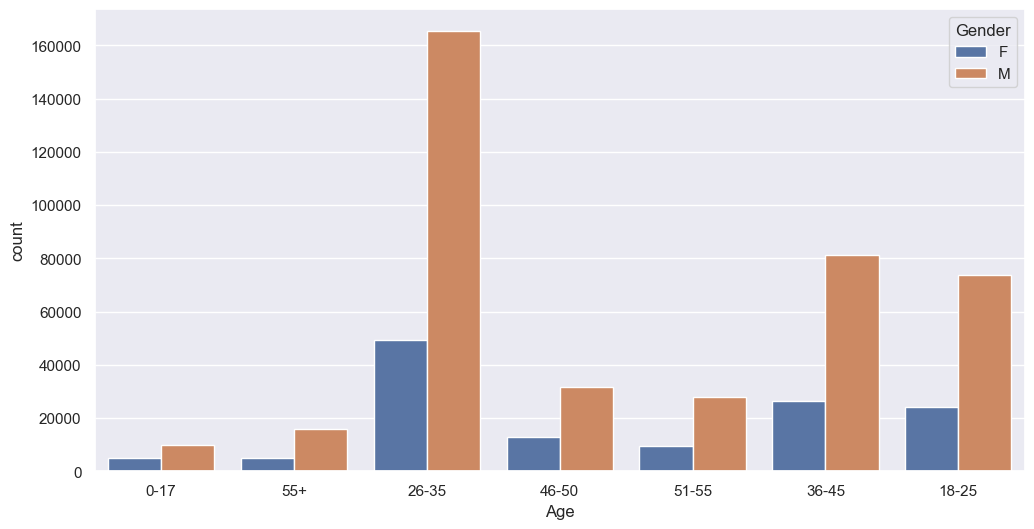

In [24]:
import seaborn as sns

sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Age", hue = 'Gender', data = df)

<Axes: xlabel='Gender', ylabel='count'>

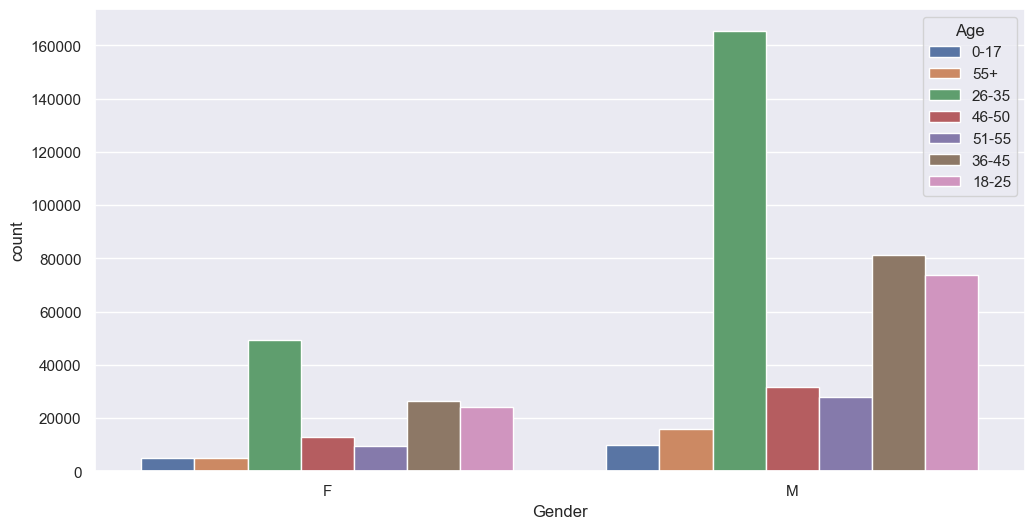

In [25]:
sns.set(rc = {'figure.figsize' : (12,6)})
sns.countplot(x = "Gender", hue = 'Age', data = df)

<Axes: xlabel='Marital_Status', ylabel='count'>

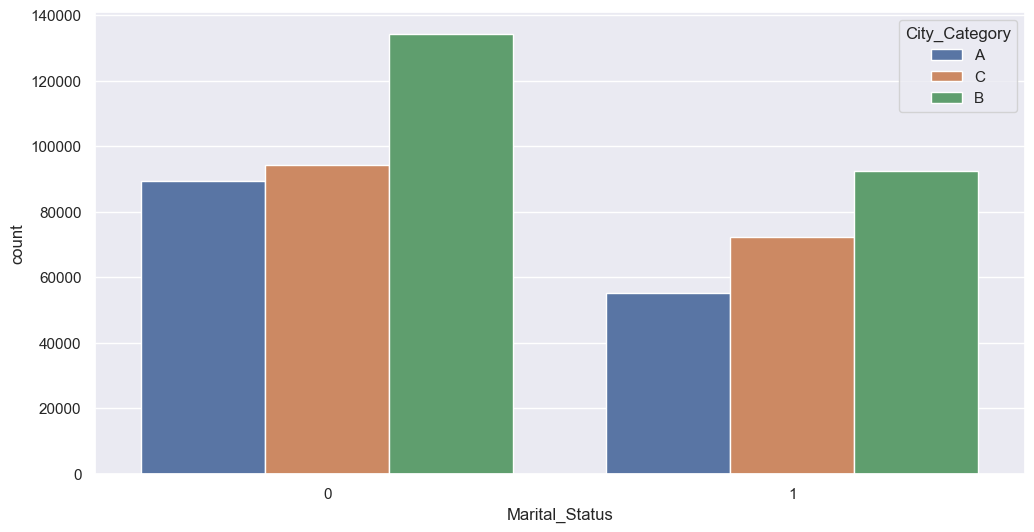

In [26]:
sns.countplot(x = 'Marital_Status', hue = 'City_Category', data = df)

<Axes: >

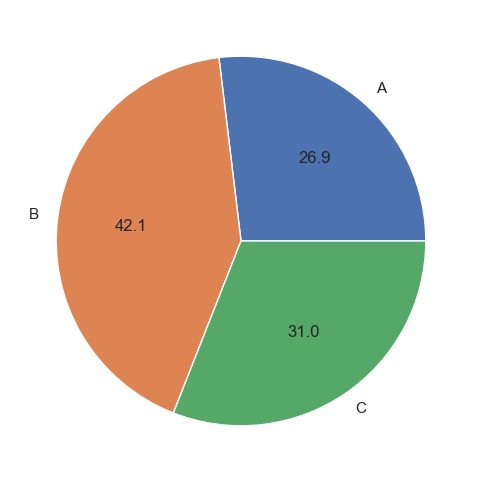

In [27]:
df.groupby('City_Category').size().plot(kind = 'pie', autopct = '%0.1f')

<Axes: xlabel='City_Category', ylabel='count'>

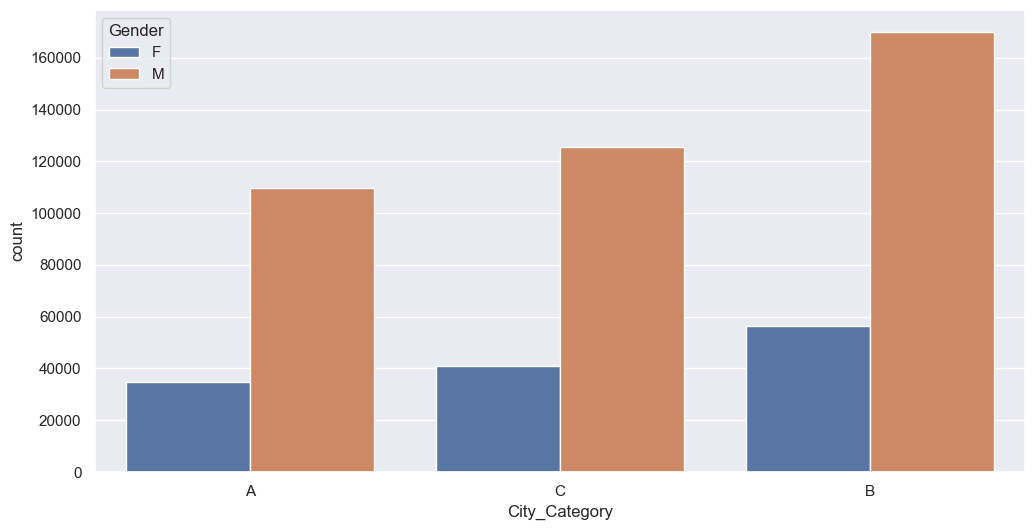

In [28]:
sns.countplot(x = 'City_Category', hue = 'Gender', data = df)

C:\Users\USER\AppData\Local\Temp\ipykernel_14836\2577192833.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('City_Category').sum()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")


<Axes: ylabel='Purchase'>

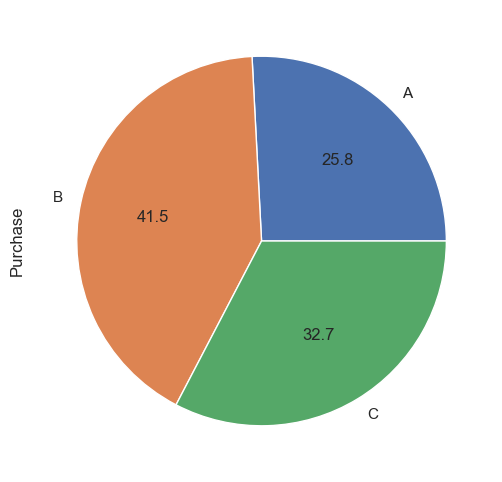

In [29]:
df.groupby('City_Category').sum()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

C:\Users\USER\AppData\Local\Temp\ipykernel_14836\906460613.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('City_Category').mean()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")


<Axes: ylabel='Purchase'>

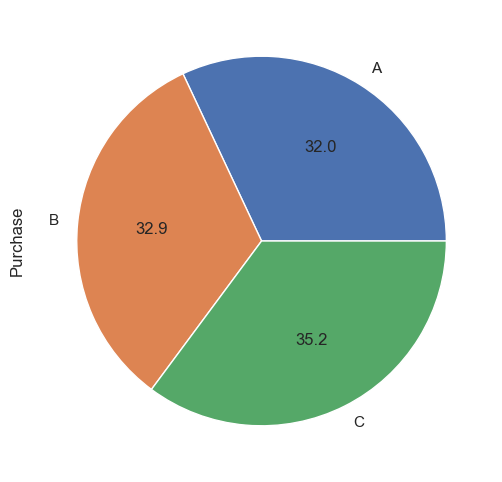

In [30]:
df.groupby('City_Category').mean()['Purchase'].plot(kind = 'pie', autopct = "%0.1f")

<b> Inference: </b> <br>
The most purchases were made by Males of age group 26-35, and Unmarried people from City B.
<hr>

<h4> Occupation and Product Analysis </h4>

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

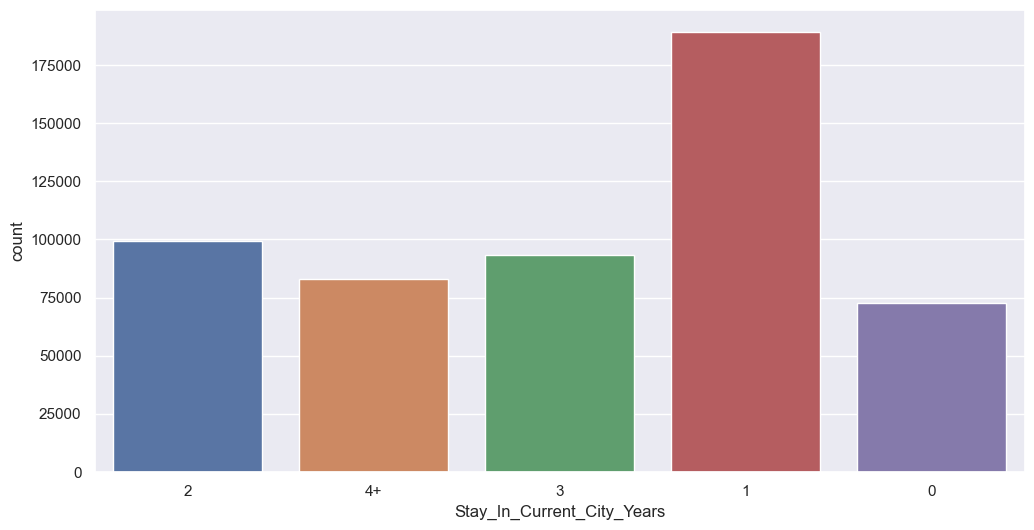

In [31]:
sns.countplot(x = df['Stay_In_Current_City_Years'])

<Axes: >

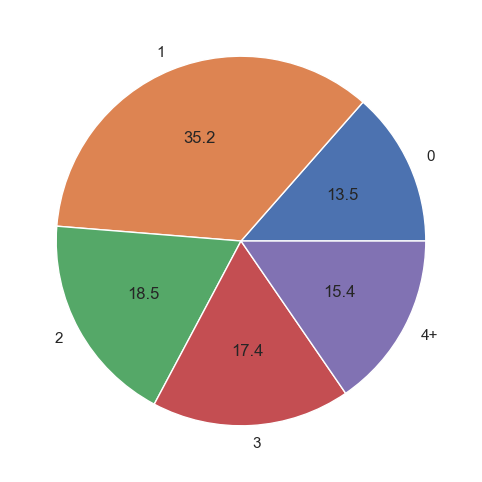

In [32]:
df.groupby('Stay_In_Current_City_Years').size().plot(kind = 'pie', autopct = "%0.1f")

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

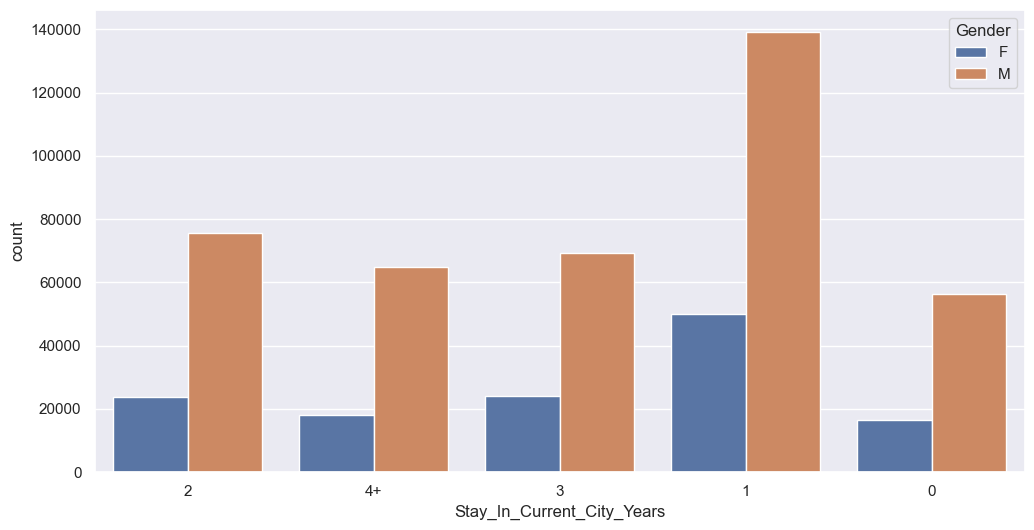

In [33]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Gender', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

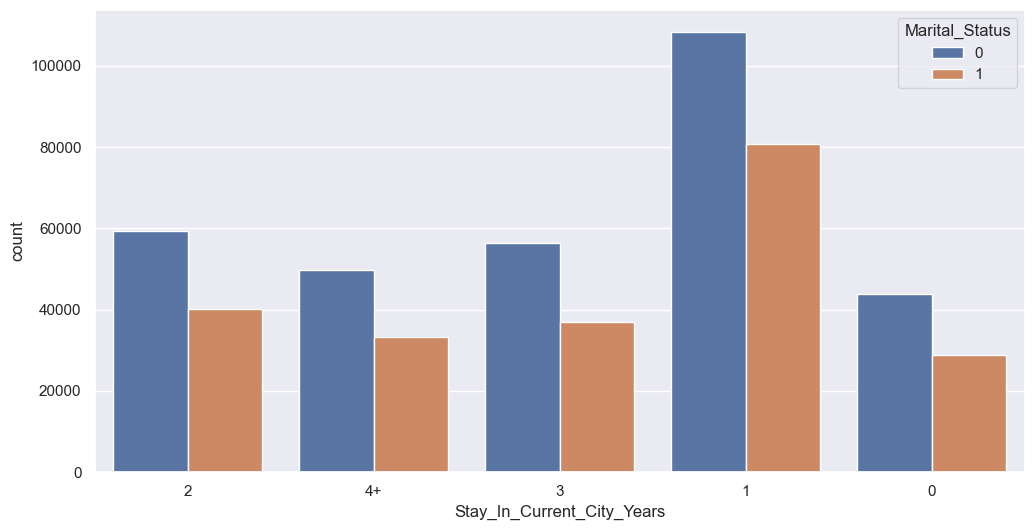

In [34]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'Marital_Status', data = df)

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

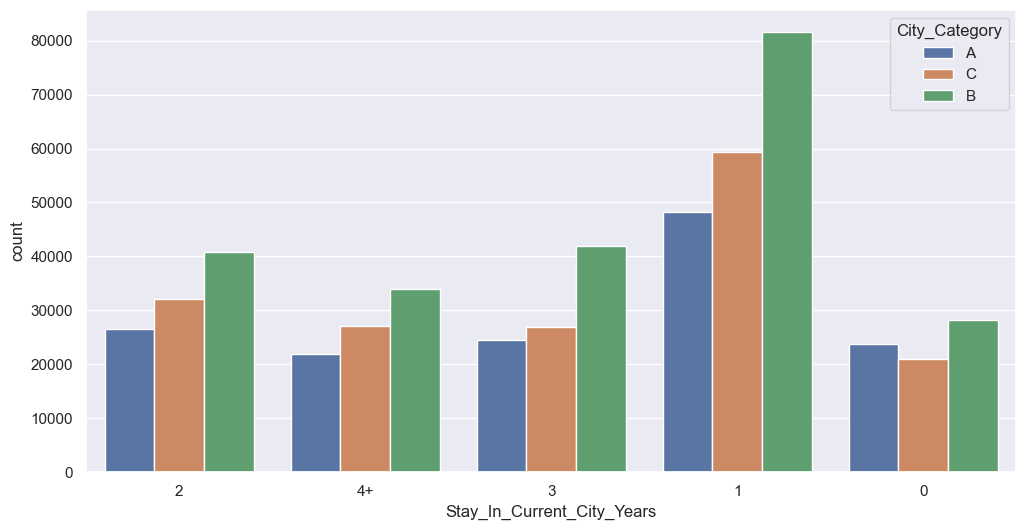

In [35]:
sns.countplot(x = 'Stay_In_Current_City_Years', hue = 'City_Category', data = df)

C:\Users\USER\AppData\Local\Temp\ipykernel_14836\2549684239.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'bar')


<Axes: xlabel='Stay_In_Current_City_Years'>

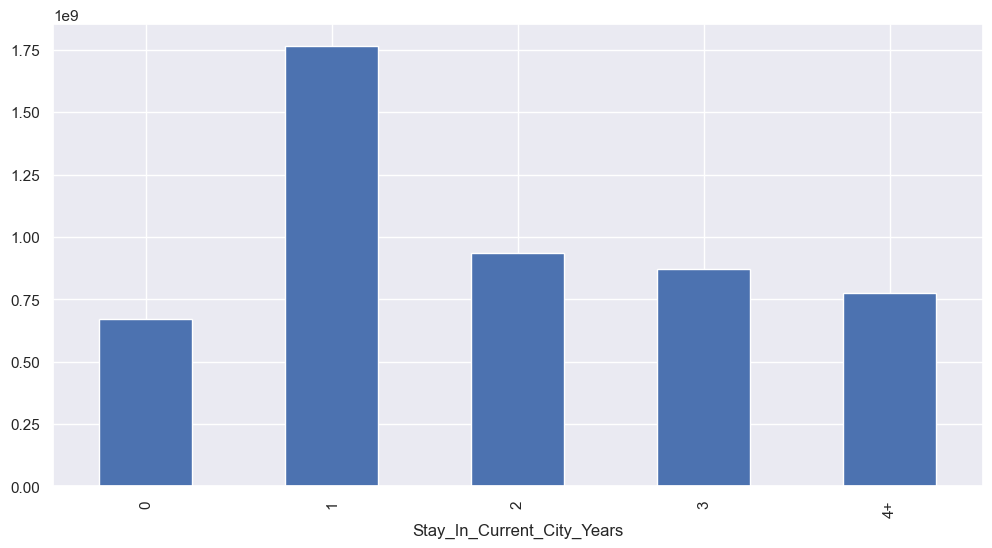

In [36]:
df.groupby('Stay_In_Current_City_Years').sum()['Purchase'].plot(kind = 'bar')

C:\Users\USER\AppData\Local\Temp\ipykernel_14836\1632985777.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Stay_In_Current_City_Years').mean()['Purchase'].plot(kind = 'bar')


<Axes: xlabel='Stay_In_Current_City_Years'>

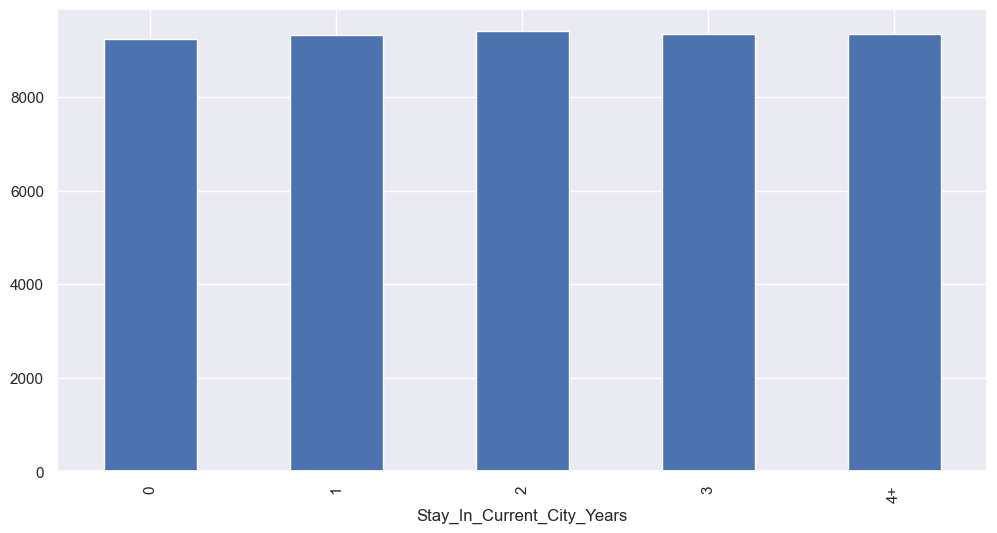

In [37]:
df.groupby('Stay_In_Current_City_Years').mean()['Purchase'].plot(kind = 'bar')

<Axes: xlabel='Occupation'>

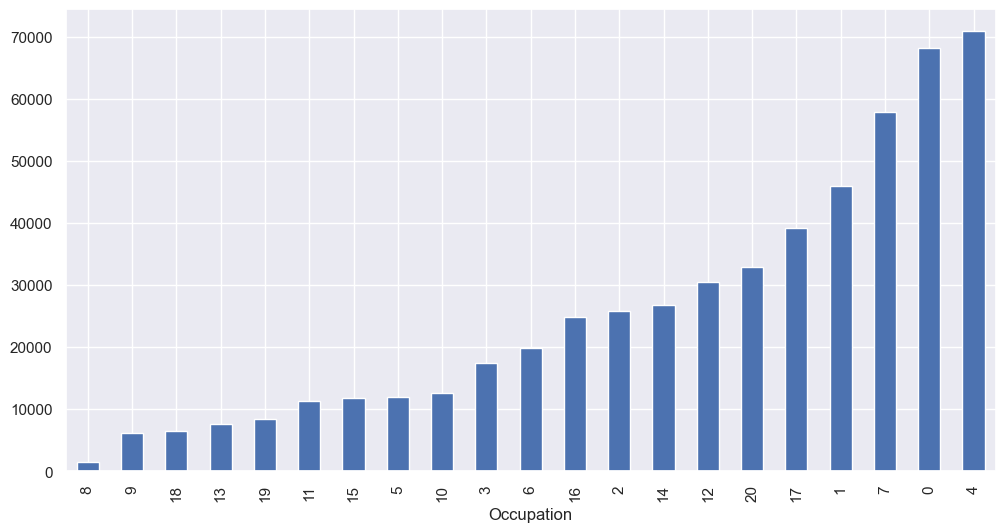

In [38]:
df.groupby('Occupation').size().sort_values().plot(kind = 'bar')

C:\Users\USER\AppData\Local\Temp\ipykernel_14836\2195280667.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')


<Axes: xlabel='Occupation'>

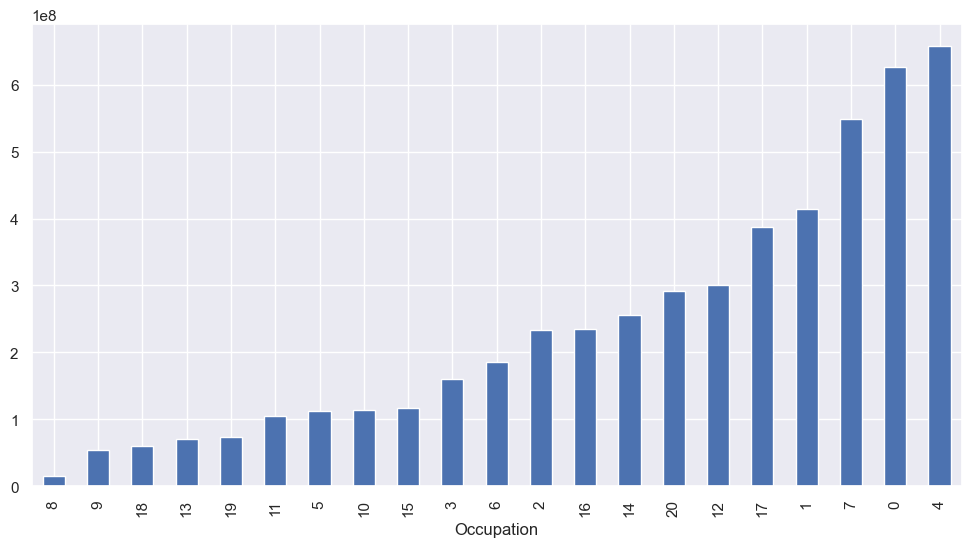

In [40]:
df.groupby('Occupation').sum()['Purchase'].sort_values().plot(kind = 'bar')

C:\Users\USER\AppData\Local\Temp\ipykernel_14836\836120488.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind = 'bar')


<Axes: xlabel='Occupation'>

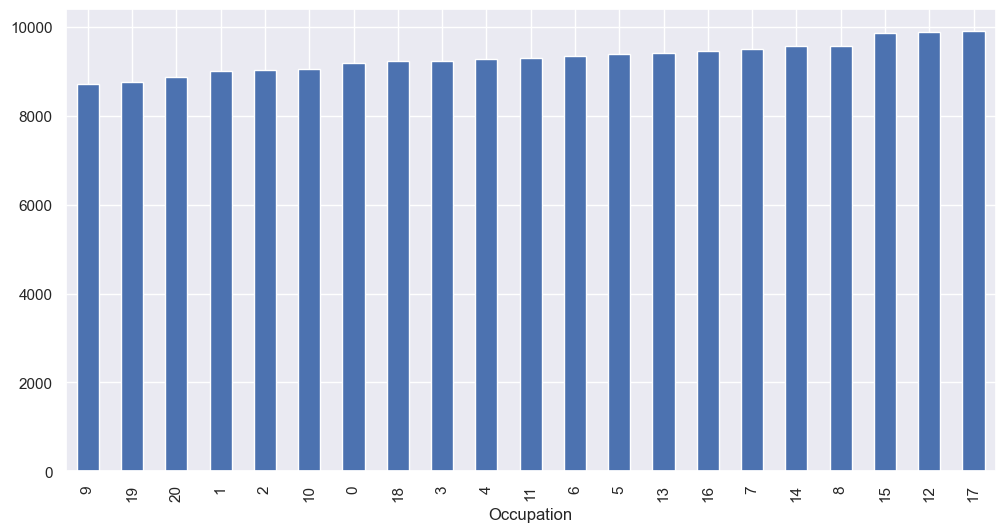

In [41]:
df.groupby('Occupation').mean()['Purchase'].sort_values().plot(kind = 'bar')

<Axes: xlabel='Occupation', ylabel='count'>

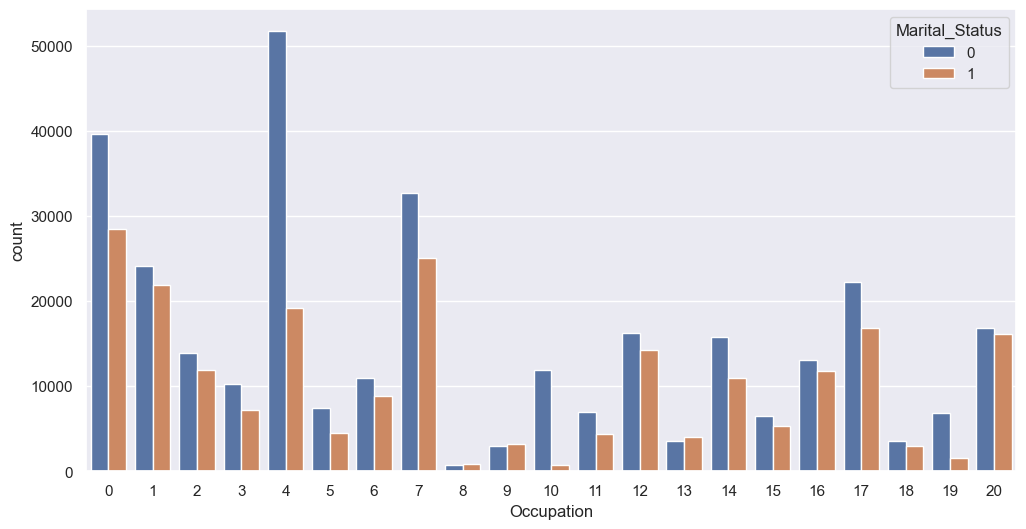

In [42]:
sns.countplot(x = 'Occupation', hue = 'Marital_Status', data = df)

<Axes: xlabel='Occupation', ylabel='count'>

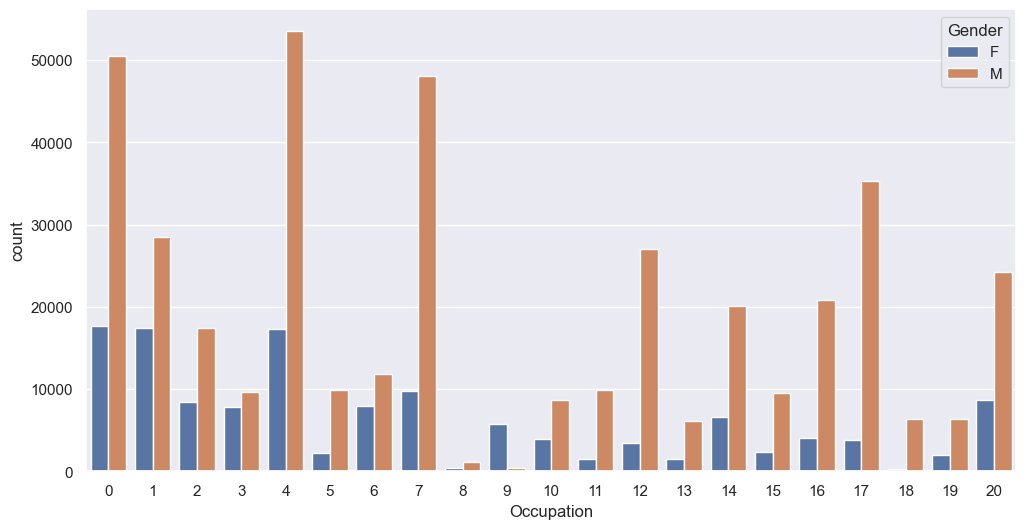

In [43]:
sns.countplot(x = 'Occupation', hue = 'Gender', data = df)

<Axes: xlabel='Product_Category_1'>

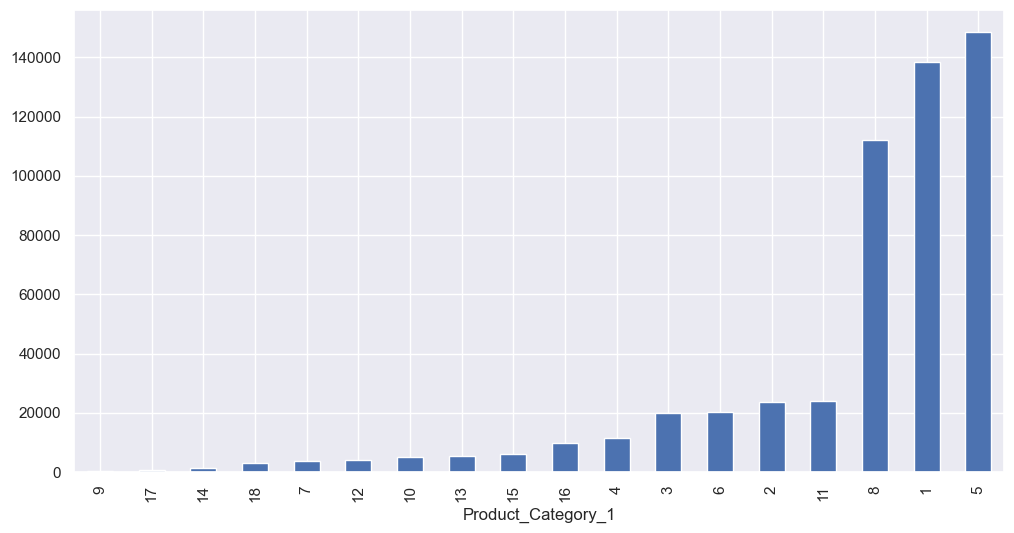

In [45]:
df.groupby('Product_Category_1').size().sort_values().plot(kind = 'bar')

C:\Users\USER\AppData\Local\Temp\ipykernel_14836\2703638129.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')


<Axes: xlabel='Product_Category_1'>

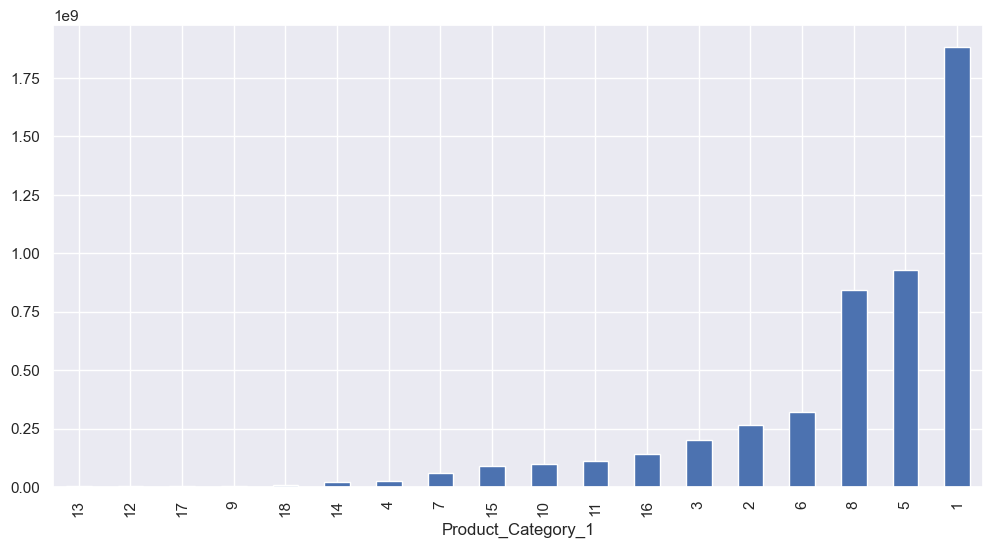

In [46]:
df.groupby('Product_Category_1').sum()['Purchase'].sort_values().plot(kind = 'bar')

C:\Users\USER\AppData\Local\Temp\ipykernel_14836\3011761601.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind = 'bar')


<Axes: xlabel='Product_Category_1'>

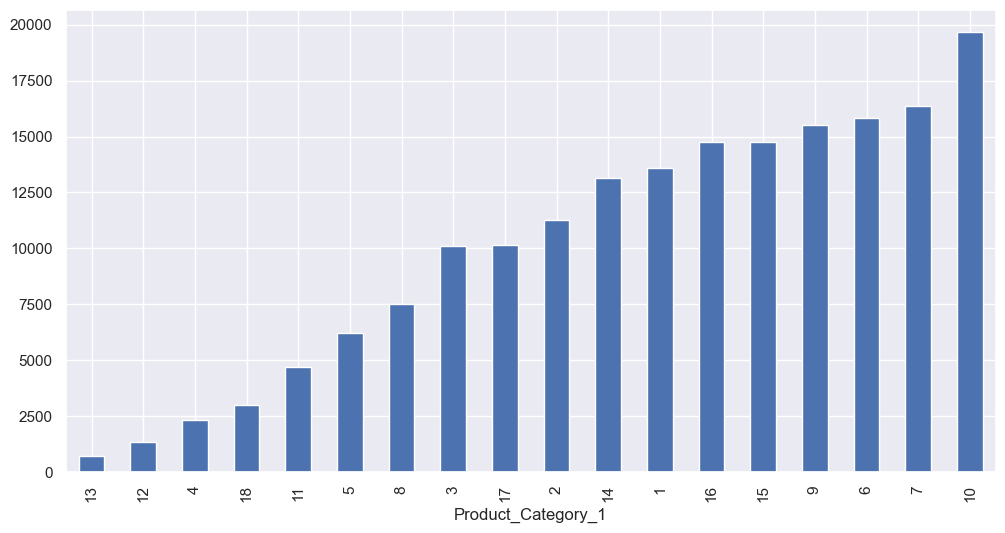

In [47]:
df.groupby('Product_Category_1').mean()['Purchase'].sort_values().plot(kind = 'bar')

C:\Users\USER\AppData\Local\Temp\ipykernel_14836\1632911214.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')


<Axes: xlabel='Product_ID'>

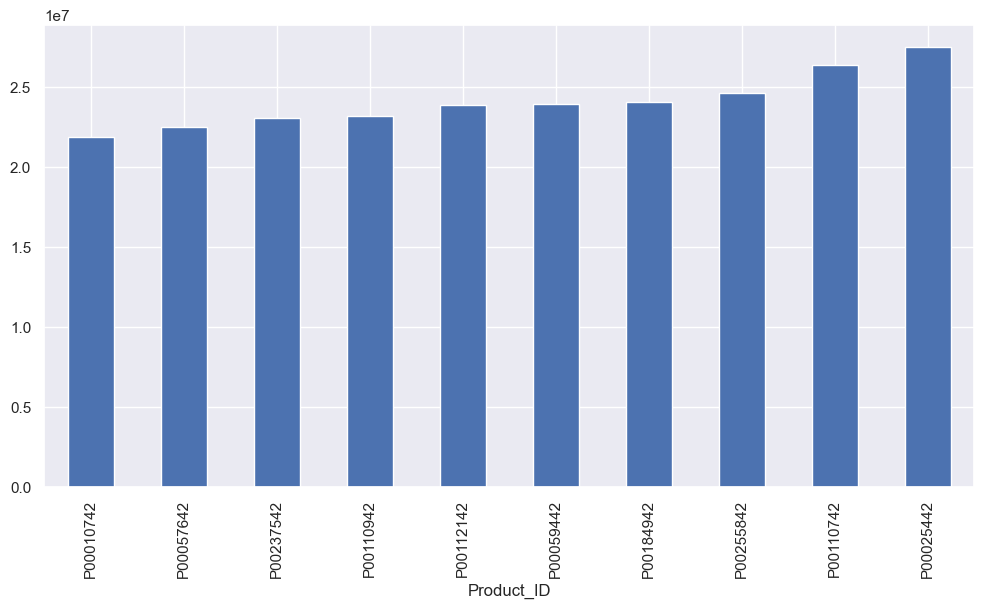

In [49]:
df.groupby('Product_ID').sum()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

C:\Users\USER\AppData\Local\Temp\ipykernel_14836\485863399.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Product_ID').mean()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')


<Axes: xlabel='Product_ID'>

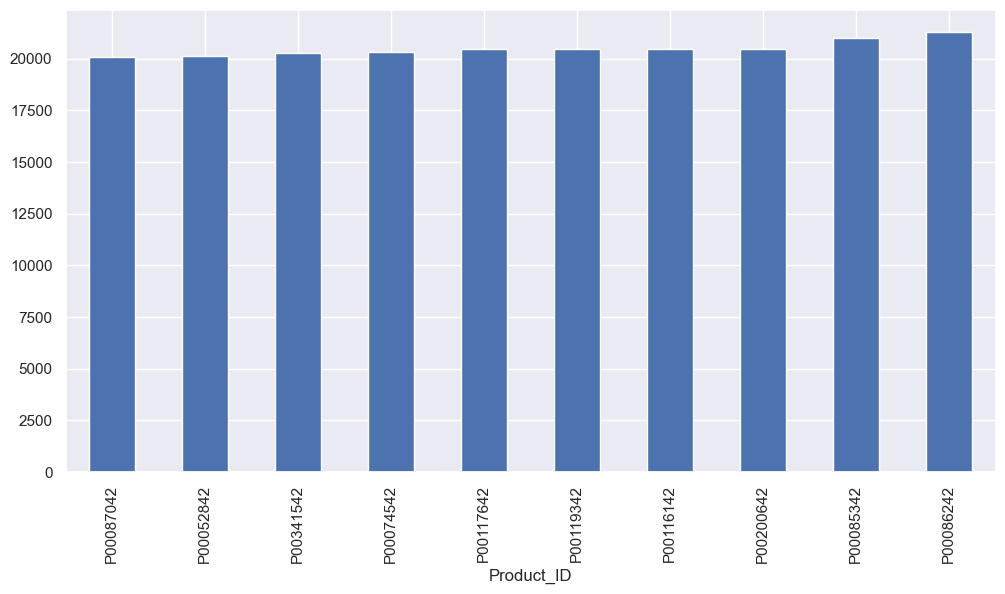

In [50]:
df.groupby('Product_ID').mean()['Purchase'].nlargest(10).sort_values().plot(kind = 'bar')

<Axes: xlabel='Product_Category_1', ylabel='count'>

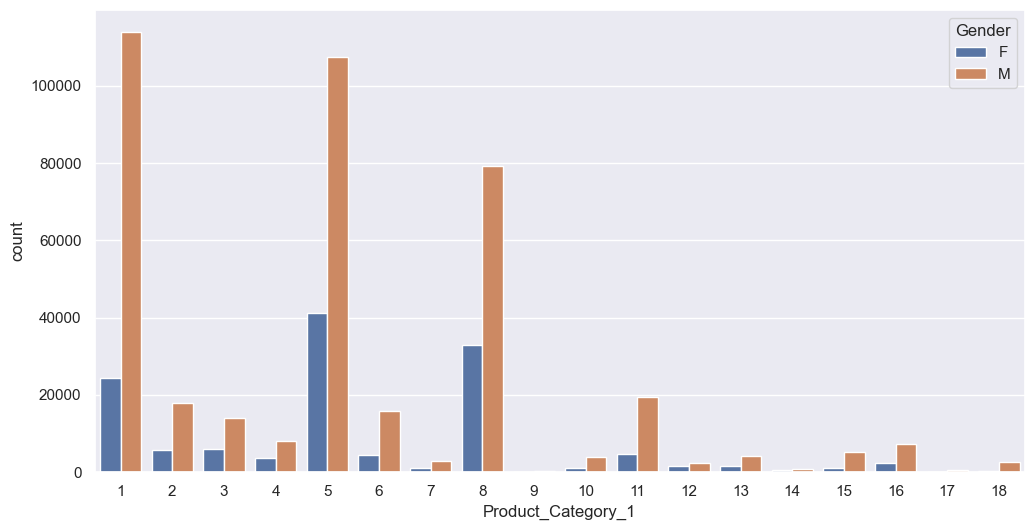

In [51]:
sns.countplot(x = 'Product_Category_1', hue = 'Gender', data = df)

<hr>

<h4> Combining Age and Marital Status </h4> 

In [52]:
lst2 = []
for i in range(len(df)):
    lst2.append(df['Gender'][i] +"_"+ str(df['Marital_Status'][i]))

df['MaritalGender'] = lst2

<Axes: xlabel='MaritalGender', ylabel='count'>

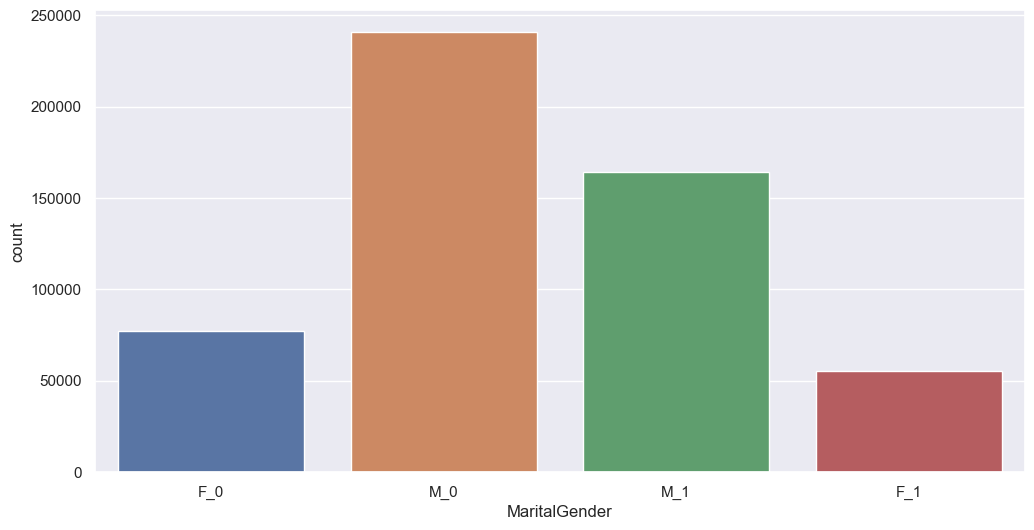

In [53]:
sns.countplot(x = df['MaritalGender'])

<Axes: xlabel='Age', ylabel='count'>

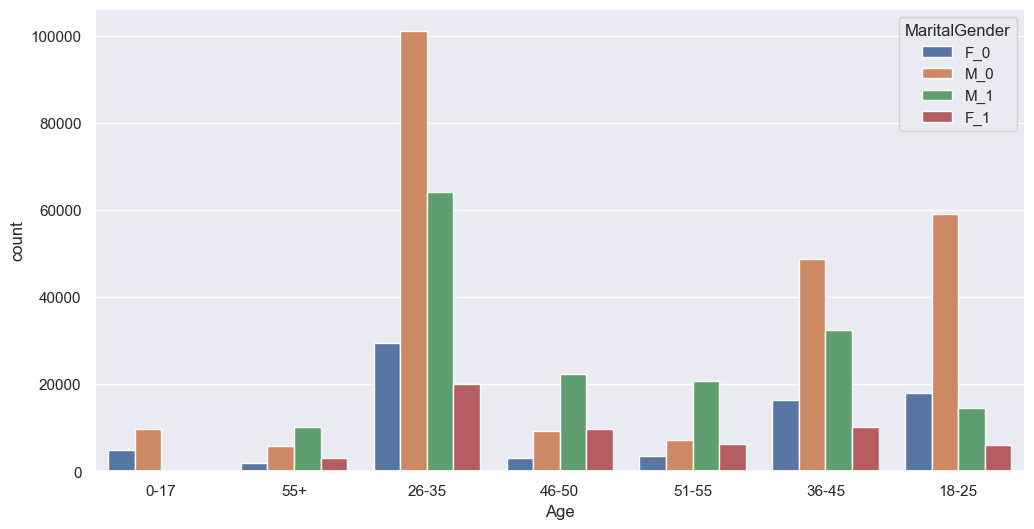

In [54]:
sns.countplot(x = df['Age'], hue = df['MaritalGender'])

<Axes: xlabel='Product_Category_1', ylabel='count'>

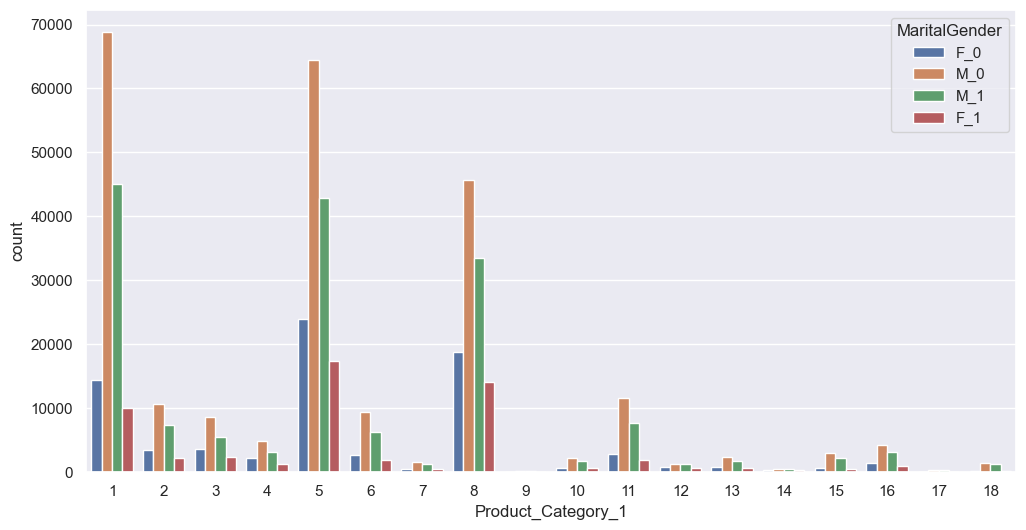

In [55]:
sns.countplot(x = df['Product_Category_1'], hue = df['MaritalGender'])

<Axes: xlabel='Stay_In_Current_City_Years', ylabel='count'>

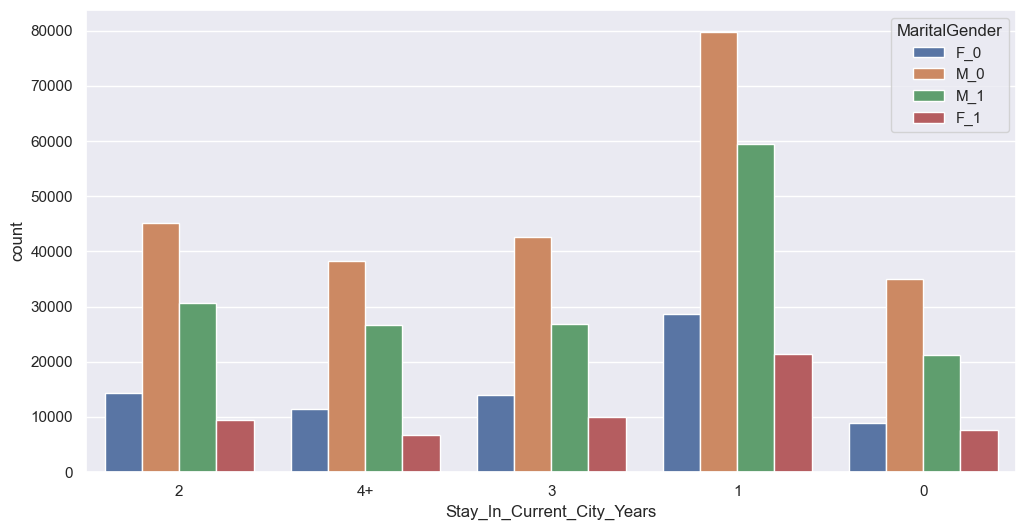

In [56]:
sns.countplot(x = df['Stay_In_Current_City_Years'], hue = df['MaritalGender'])

<Axes: xlabel='City_Category', ylabel='count'>

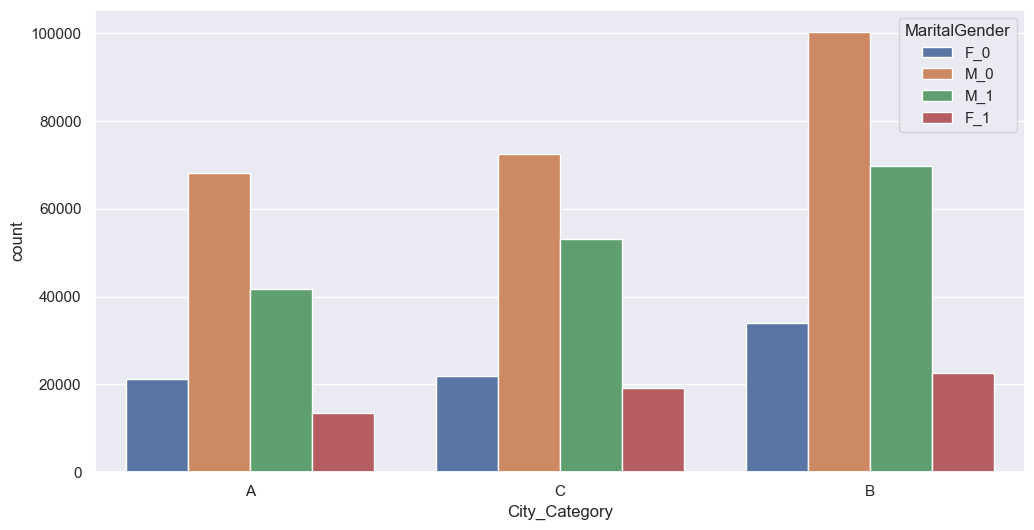

In [57]:
sns.countplot(x = df['City_Category'], hue = df['MaritalGender'])

<b> Inference:</b><br>
Unmarried Males are the major purchasers of products, specifically from the age group 26-35. <br>
They are most likely to have stayed for only a year in their current city and majorly belong to City B.
<hr>